# PROYECTO FUGA DE EMPLEADOS

### Carga de librerias

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de los datos

In [6]:
df = pd.read_csv('AbandonoEmpleados.csv', sep=';', index_col='id', na_values='#N/D')

In [8]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

### Análisis de nulos

In [12]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusiones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA

In [15]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


### EDA Variables Categoricas 

In [170]:
def graficos_eda_categoricos(cat):

    #Calcular el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definir el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (21, filas * 6))

    #Aplanar para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Crear el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

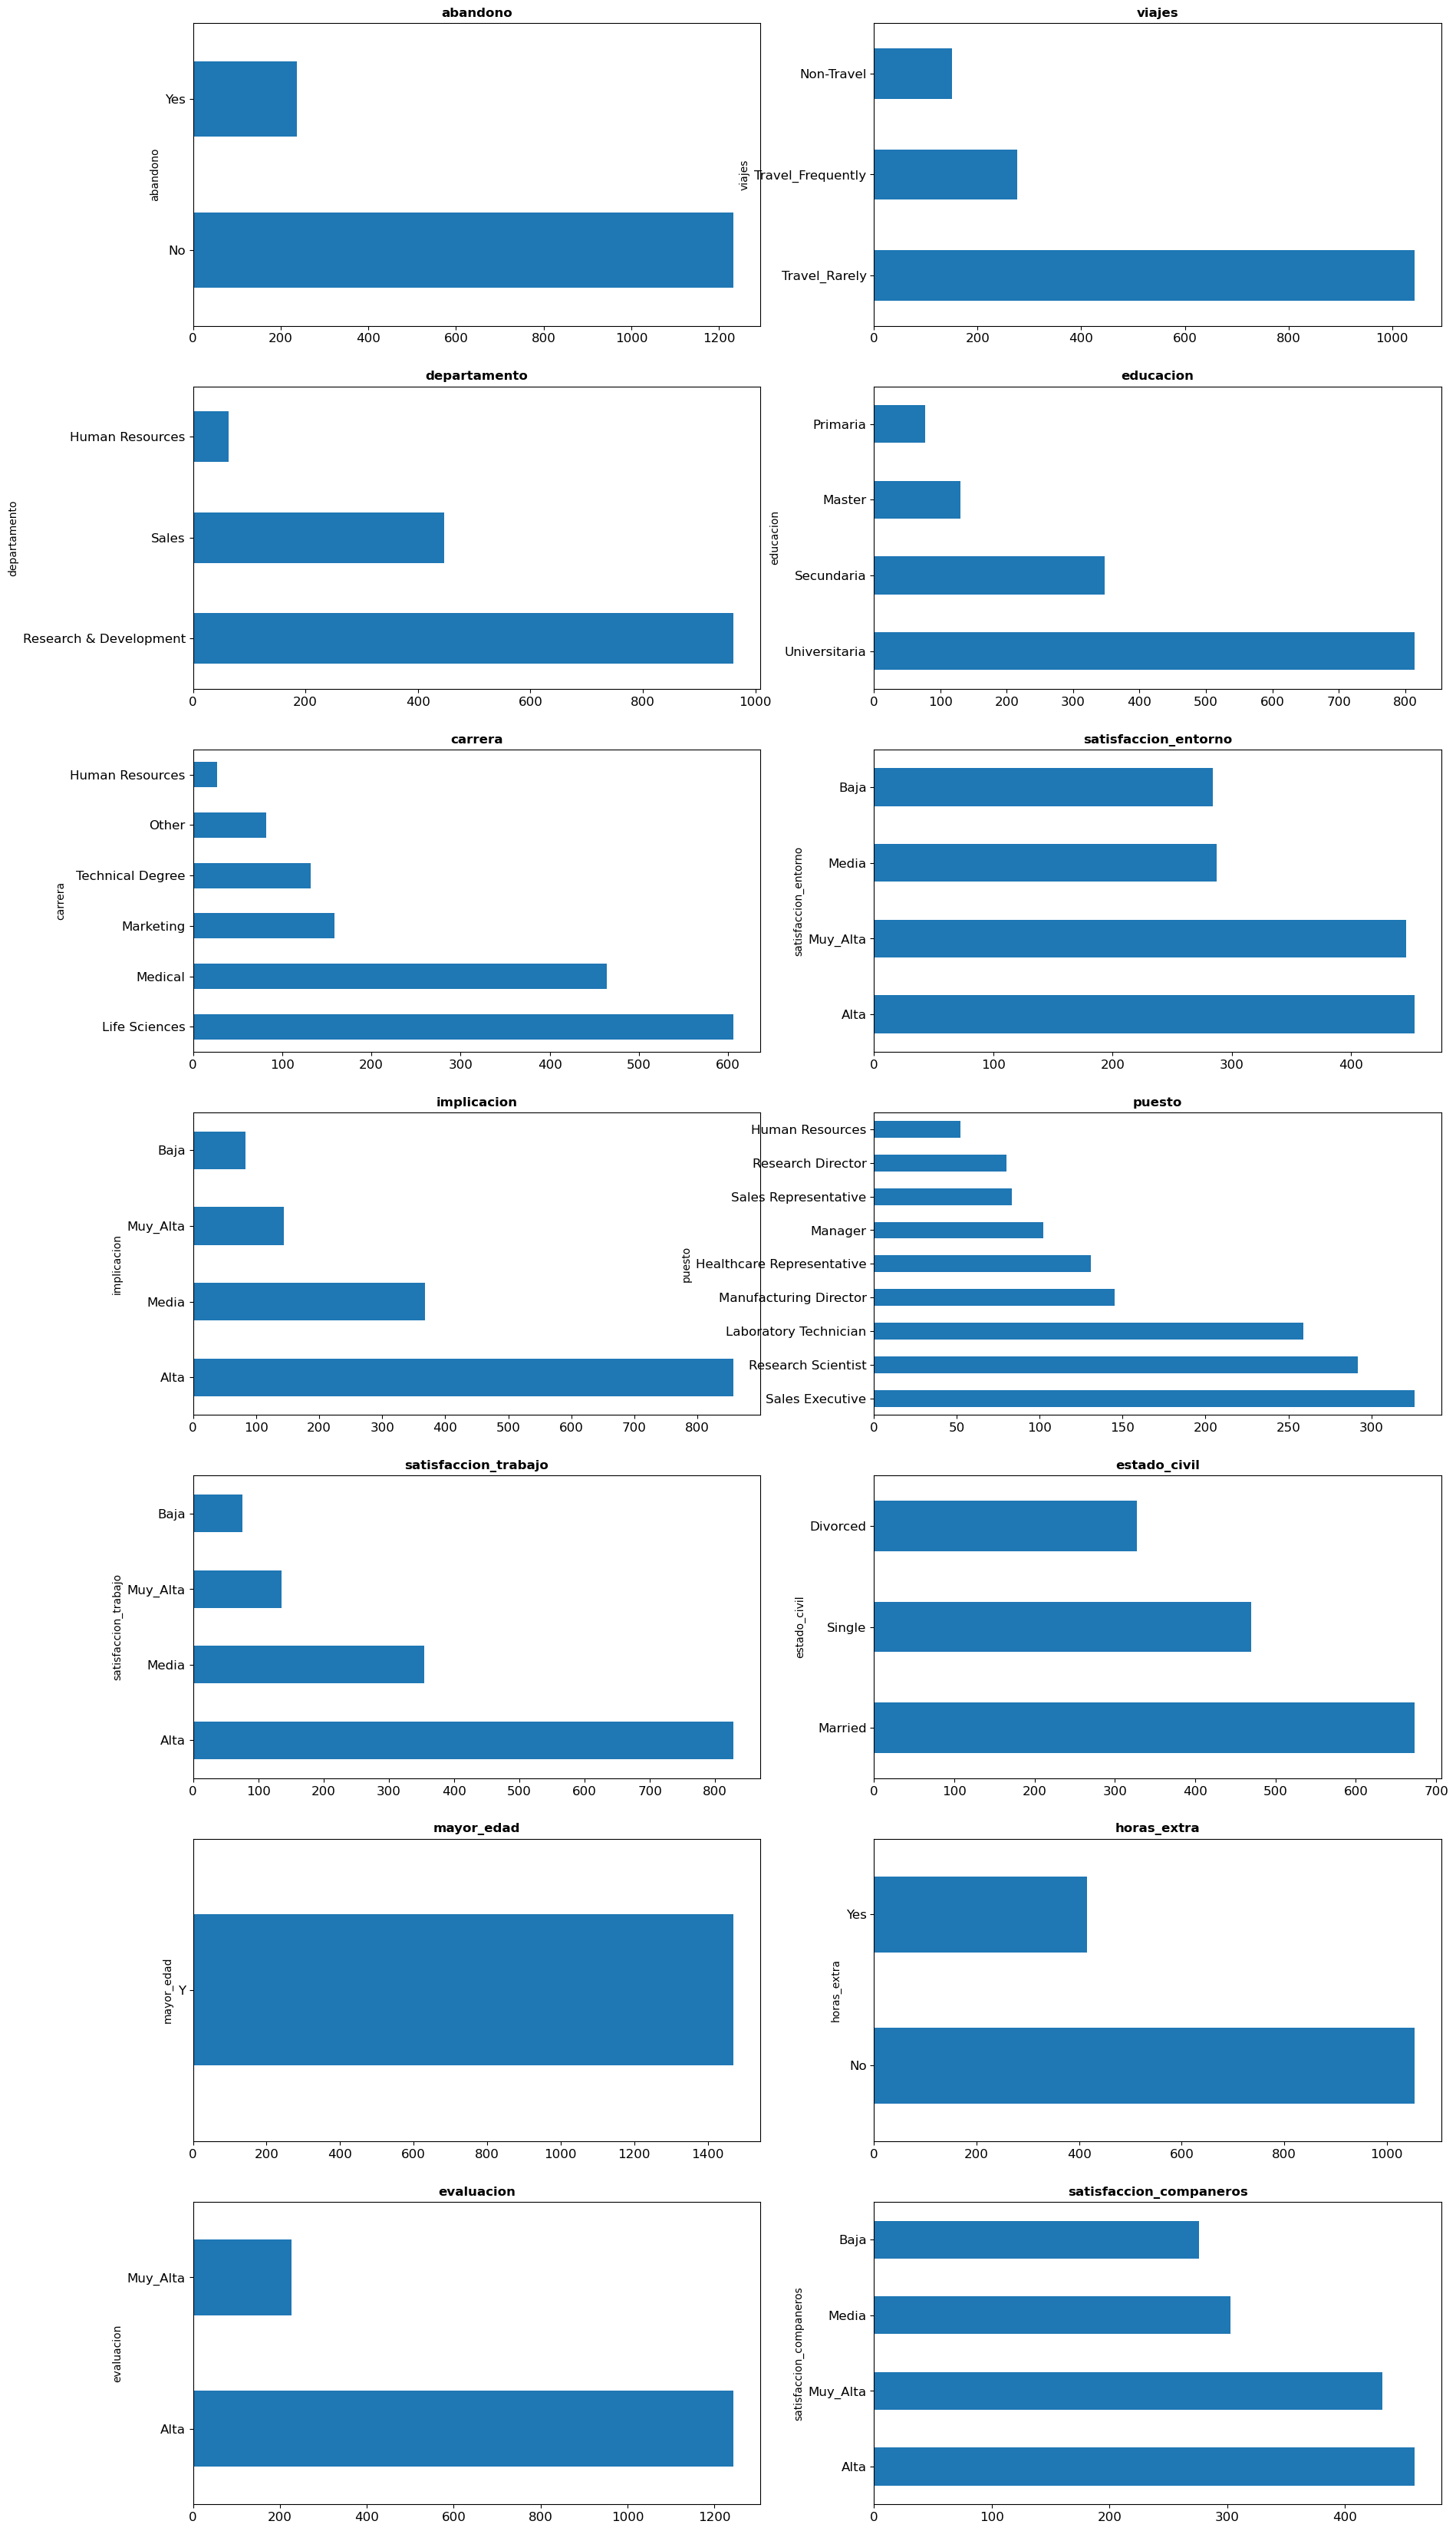

In [19]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* mayor_edad solo tiene un valor --> eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [22]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

### EDA Variables Numéricas

In [172]:
def estadisticos_cont(num):
    #Calcular describe
    estadisticos = num.describe().T
    #Añadir la mediana
    estadisticos['median'] = num.median()
    #Reordenar para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    
    return(estadisticos)

In [26]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como se va a eliminar ya no hay que imputar nada

In [30]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### Generación de Insights

- Cuantificar el problema: ¿Cual es la tasa de abandono?

In [32]:
df.abandono.value_counts(normalize = True) * 100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

- ¿Hay un perfil tipo de empleado que deja la empresa?

In [34]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

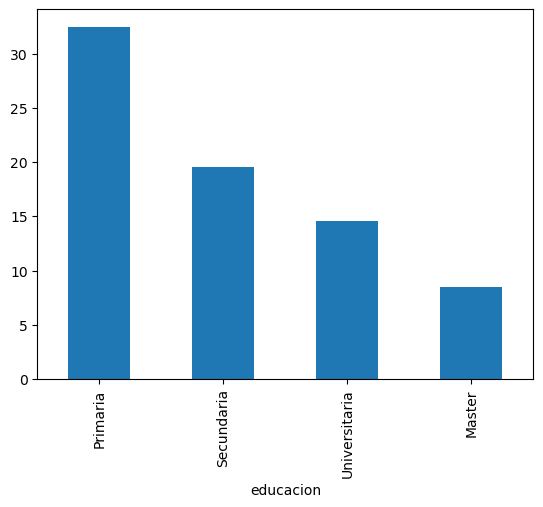

In [36]:
# Analisis por educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

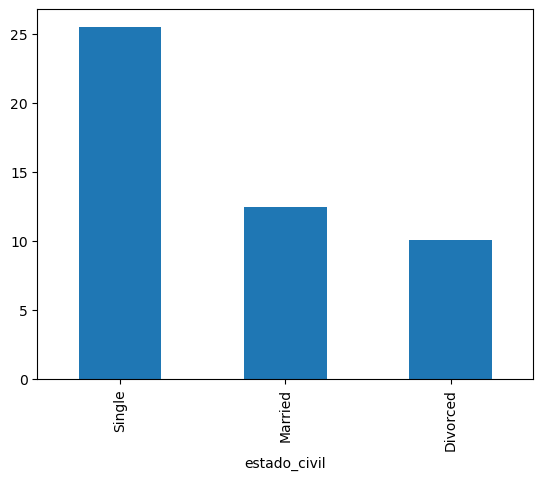

In [38]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

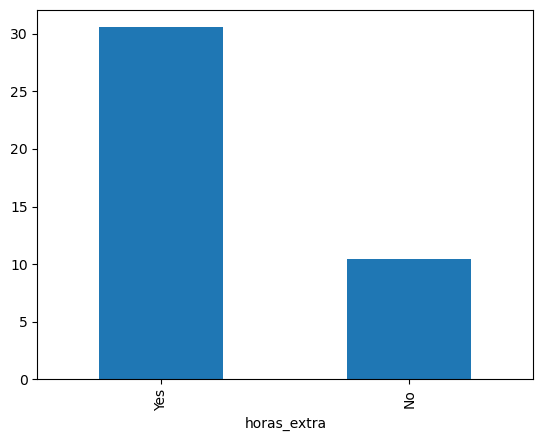

In [40]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

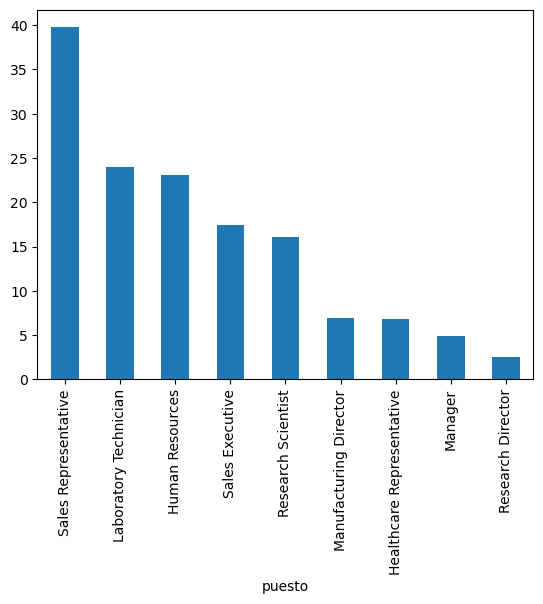

In [42]:
# Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

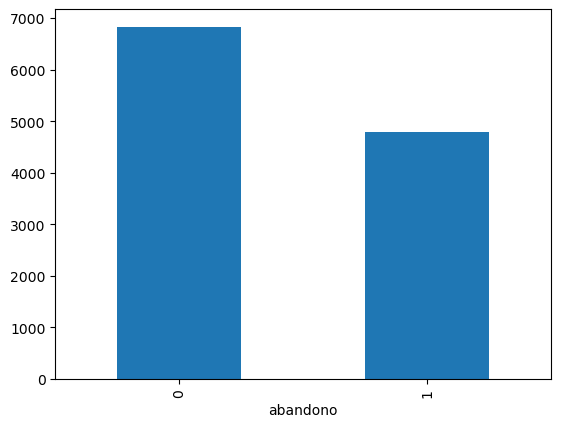

In [44]:
# Analisis por salario
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

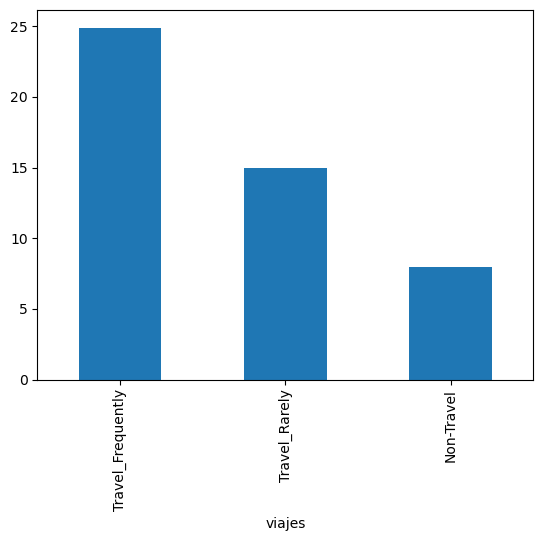

In [46]:
# Analisis por viajes
temp = df.groupby('viajes').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

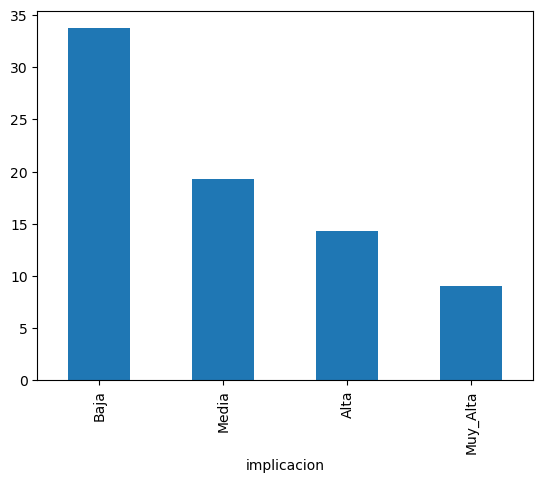

In [48]:
# Analisis por implicacion
temp = df.groupby('implicacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

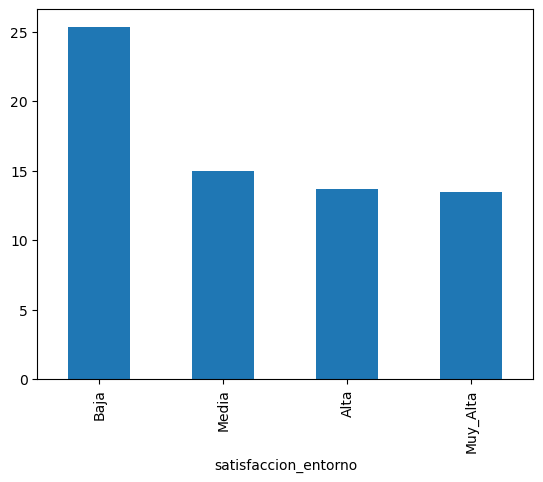

In [50]:
# Analisis por satisfaccion con el entorno
temp = df.groupby('satisfaccion_entorno').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

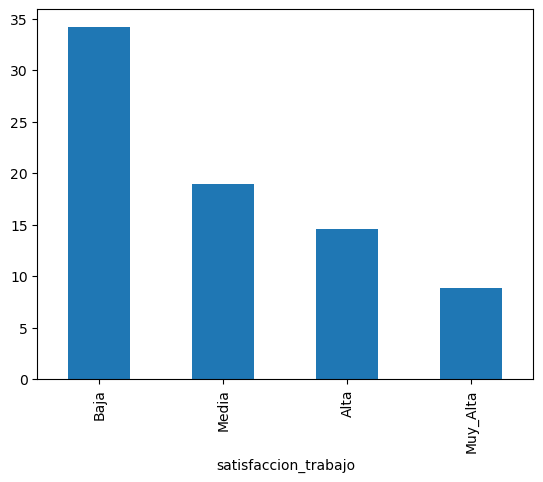

In [52]:
# Analisis por satisfaccion con el trabajo
temp = df.groupby('satisfaccion_trabajo').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

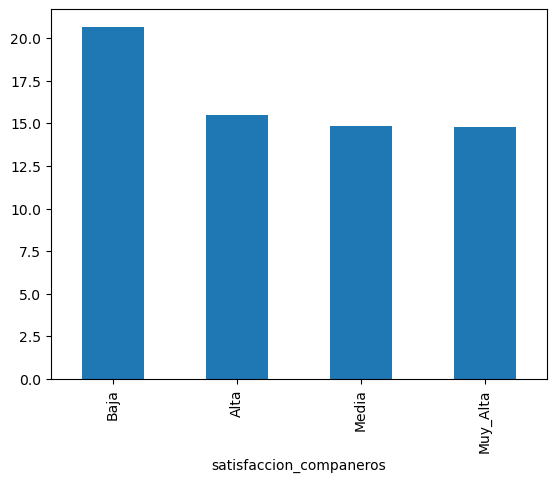

In [54]:
# Analisis por satisfaccion con los compañeros
temp = df.groupby('satisfaccion_companeros').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

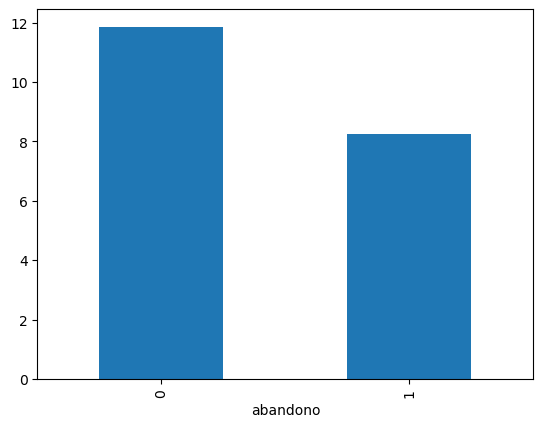

In [56]:
# Analisis por años de experiencia
temp = df.groupby('abandono').anos_experiencia.mean()
temp.plot.bar();

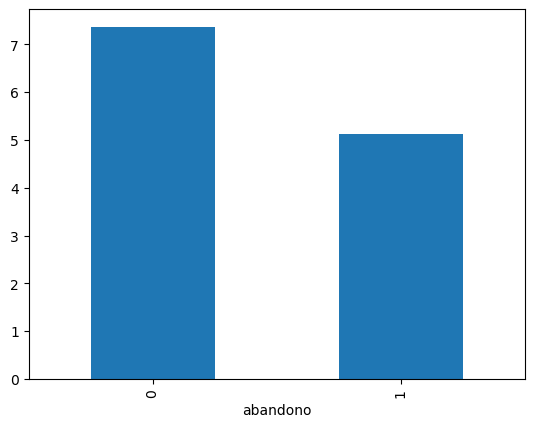

In [58]:
# Analisis por años en la compañia
temp = df.groupby('abandono').anos_compania.mean()
temp.plot.bar();

CONCLUSIONES: 
El perfil medio del empleado que deja la empresa es:
- Bajo nivel educativo
- Soltero
- Trabaja en ventas
- Bajo salario
- Alta carga de horas extras
- Viaja frecuentemente
- Baja implicación y satisfacción con el trabajo, entorno y compañeros
- Menos de 8 años de experiencia
- Menos de 5 años en la compañia

- ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [174]:
# Crear una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [176]:
# Calcular el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, 
              df.salario_ano * 0.197, 
              df.salario_ano * 0.204, 
              df.salario_ano * 0.21]

#Aplicar select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.328125
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.048159
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.777778
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.114650
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.048159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.078652
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.048159
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.114650


- ¿Cuanto ha costado este problema el último año?

In [65]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

- ¿Cuanto cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [67]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

- ¿Cuanto cuesta que los empleados no estén satisfechos con su trabajo? (pérdidas en satisfaccion_trabajo == Baja)

In [69]:
df.loc[(df.abandono == 1) & (df.satisfaccion_trabajo == 'Baja')].impacto_abandono.sum()

355126.86

- ¿Cuanto dinero se podría ahorrar fidelizando mejor a nuestros empleados?

In [182]:
print(f"Reducir un 10% la fuga de empleados ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados ahorraría 815701$ cada año.


- Y se pueden seguir trazando estrategias asociadas a los insights de abandono:

Se había visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si se disminuye la fuga un 30%?

-Calcular el % de representantes de ventas que se han ido el año pasado

In [74]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

print("Total de Representantes de Ventas:", total_repre_pasado)
print("Número de Abandonos entre Representantes de Ventas:", abandonos_repre_pasado)
print("Porcentaje de Abandonos:", porc_pasado*100)

Total de Representantes de Ventas: 83
Número de Abandonos entre Representantes de Ventas: 33
Porcentaje de Abandonos: 39.75903614457831



Ahora vamos a estimar cuántos se irán este año

In [77]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

print(f'Se irán {se_iran} empleados')

Se irán 19 empleados


Sobre ellos cuantos se pueden retener (hipótesis 30%) y cuanto dinero puede suponer

In [80]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y esto supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y esto supondría ahorrar 37447.22424578312$.


Este dato también es muy interesante porque permite determinar el presupuesto para acciones de retención por departamento o perfil.
Sabiendo que se pueden gastaros hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

### MODELO DE MACHINE LEARNING

In [84]:
df_ml = df.copy()

In [86]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

### Preparación de los datos para modelización

- Transformar variables categóricas a numéricas

In [88]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse_output = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [89]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


- DataFrame final

Se seleccionan las variables numéricas para poder juntarlas a las cat_hoe

In [93]:
num = df.select_dtypes('number').reset_index(drop = True)

Se juntan todas en el DataFrame final

In [96]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### Diseño de la modelización

- Separación variables predictoras (x) y variable target (y)

In [98]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

- Separación grupo train y grupo test

In [100]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

### Entrenamiento del modelo sobre el grupo train (Arboles de Decision)

In [104]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### Predicción y Validación sobre el grupo test

In [106]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:30]

array([0.04815864, 0.07865169, 0.04815864, 0.04815864, 0.04815864,
       0.04815864, 0.12107623, 0.12107623, 0.04815864, 0.04815864,
       0.12107623, 0.04815864, 0.77777778, 0.04815864, 0.04815864,
       0.328125  , 0.04815864, 0.328125  , 0.07865169, 0.12107623,
       0.328125  , 0.48571429, 0.04815864, 0.11464968, 0.12107623,
       0.04815864, 0.328125  , 0.11464968, 0.328125  , 0.11464968])

In [110]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]

# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.713410237923576

### OPTIMIZACIÓN DE PARÁMETROS

### Arboles de Decision

In [113]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#Instanciar
tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

#Entrenar
tree_cv.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [115]:
print("Mejores parametros: ", tree_cv.best_params_)
print("Precisión Train: ", tree_cv.best_score_)
print("Precisión Test: ", tree_cv.score(test_x, test_y))

Mejores parametros:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
Precisión Train:  0.8542547115933752
Precisión Test:  0.8276643990929705


In [117]:
# Predicción
pred_tree = tree_cv.predict_proba(test_x)[:, 1]
# Evaluación
roc_auc_score(test_y,pred_tree)

0.7576604181687095

### Regresion Logistica

In [127]:
from sklearn.preprocessing import StandardScaler
# Escalar los datos
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [129]:
from sklearn.linear_model import LogisticRegression

parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['lbfgs'],
              'max_iter': [500]}

lr = LogisticRegression(class_weight='balanced')
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(train_x_scaled, train_y)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [500],
                         'penalty': ['l2'], 'solver': ['lbfgs']})

In [131]:
print("Mejores parametros: ", logreg_cv.best_params_)
print("Precisión Train: ", logreg_cv.best_score_)
print("Precisión Test: ", logreg_cv.score(test_x, test_y))

Mejores parametros:  {'C': 0.01, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Precisión Train:  0.7561107938320959
Precisión Test:  0.8276643990929705


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [133]:
# Predicción
pred_lr = logreg_cv.predict_proba(test_x)[:, 1]
pred_lr[:30]
# Evaluación
roc_auc_score(test_y,pred_lr)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.5051910598413842

### Support Vector Machine

In [136]:
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf', 'sigmoid'),
              'C': np.logspace(-2, 2, 3),
              'gamma':np.logspace(-2, 2, 3)}
svm = SVC()

In [138]:
from sklearn.model_selection import GridSearchCV
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=5, n_jobs=-1)
svm_cv.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e+00, 1.e+02]),
                         'gamma': array([1.e-02, 1.e+00, 1.e+02]),
                         'kernel': ('linear', 'rbf', 'sigmoid')})

In [140]:
print("Mejores parametros: ", svm_cv.best_params_)
print("Precisión Train: ", svm_cv.best_score_)
print("Precisión Test: ", svm_cv.score(test_x, test_y))

Mejores parametros:  {'C': 100.0, 'gamma': 0.01, 'kernel': 'linear'}
Precisión Train:  0.8493772199857921
Precisión Test:  0.8253968253968254


In [142]:
# Predicción
pred_svm = svm_cv.decision_function(test_x)

# Evaluación
roc_auc_score(test_y,pred_svm)

0.6958543619322278

### KNN

In [146]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [148]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
knn_cv.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [150]:
print("Mejores parametros: ", knn_cv.best_params_)
print("Precisión Train: ", knn_cv.best_score_)
print("Precisión Test: ", knn_cv.score(test_x, test_y))

Mejores parametros:  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
Precisión Train:  0.8328574148105844
Precisión Test:  0.8253968253968254


In [152]:
# Predicción 
pred_knn = knn_cv.predict_proba(test_x)[:, 1]

# Evaluación
roc_auc_score(test_y, pred_knn)

0.530155010814708

In [154]:
metrics = {'Modelo': ['Tree', 'LR', 'SVM', 'KNN'],
           'Precision (Training)': [tree_cv.best_score_, logreg_cv.best_score_, svm_cv.best_score_, knn_cv.best_score_],
           'Precision (Testing)': [tree_cv.score(test_x, test_y), logreg_cv.score(test_x, test_y), svm_cv.score(test_x, test_y), knn_cv.score(test_x, test_y)],
           'Roc Auc Score': [roc_auc_score(test_y,pred_tree), roc_auc_score(test_y,pred_lr), roc_auc_score(test_y,pred_svm), roc_auc_score(test_y, pred_knn)]}

report = pd.DataFrame(metrics)
report

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Modelo,Precision (Training),Precision (Testing),Roc Auc Score
0,Tree,0.854255,0.827664,0.757660
1,LR,0.756111,0.827664,0.505191
2,SVM,0.849377,0.825397,0.695854
3,KNN,0.832857,0.825397,0.530155


### Interpretación

- Diagrama del arbol de desición

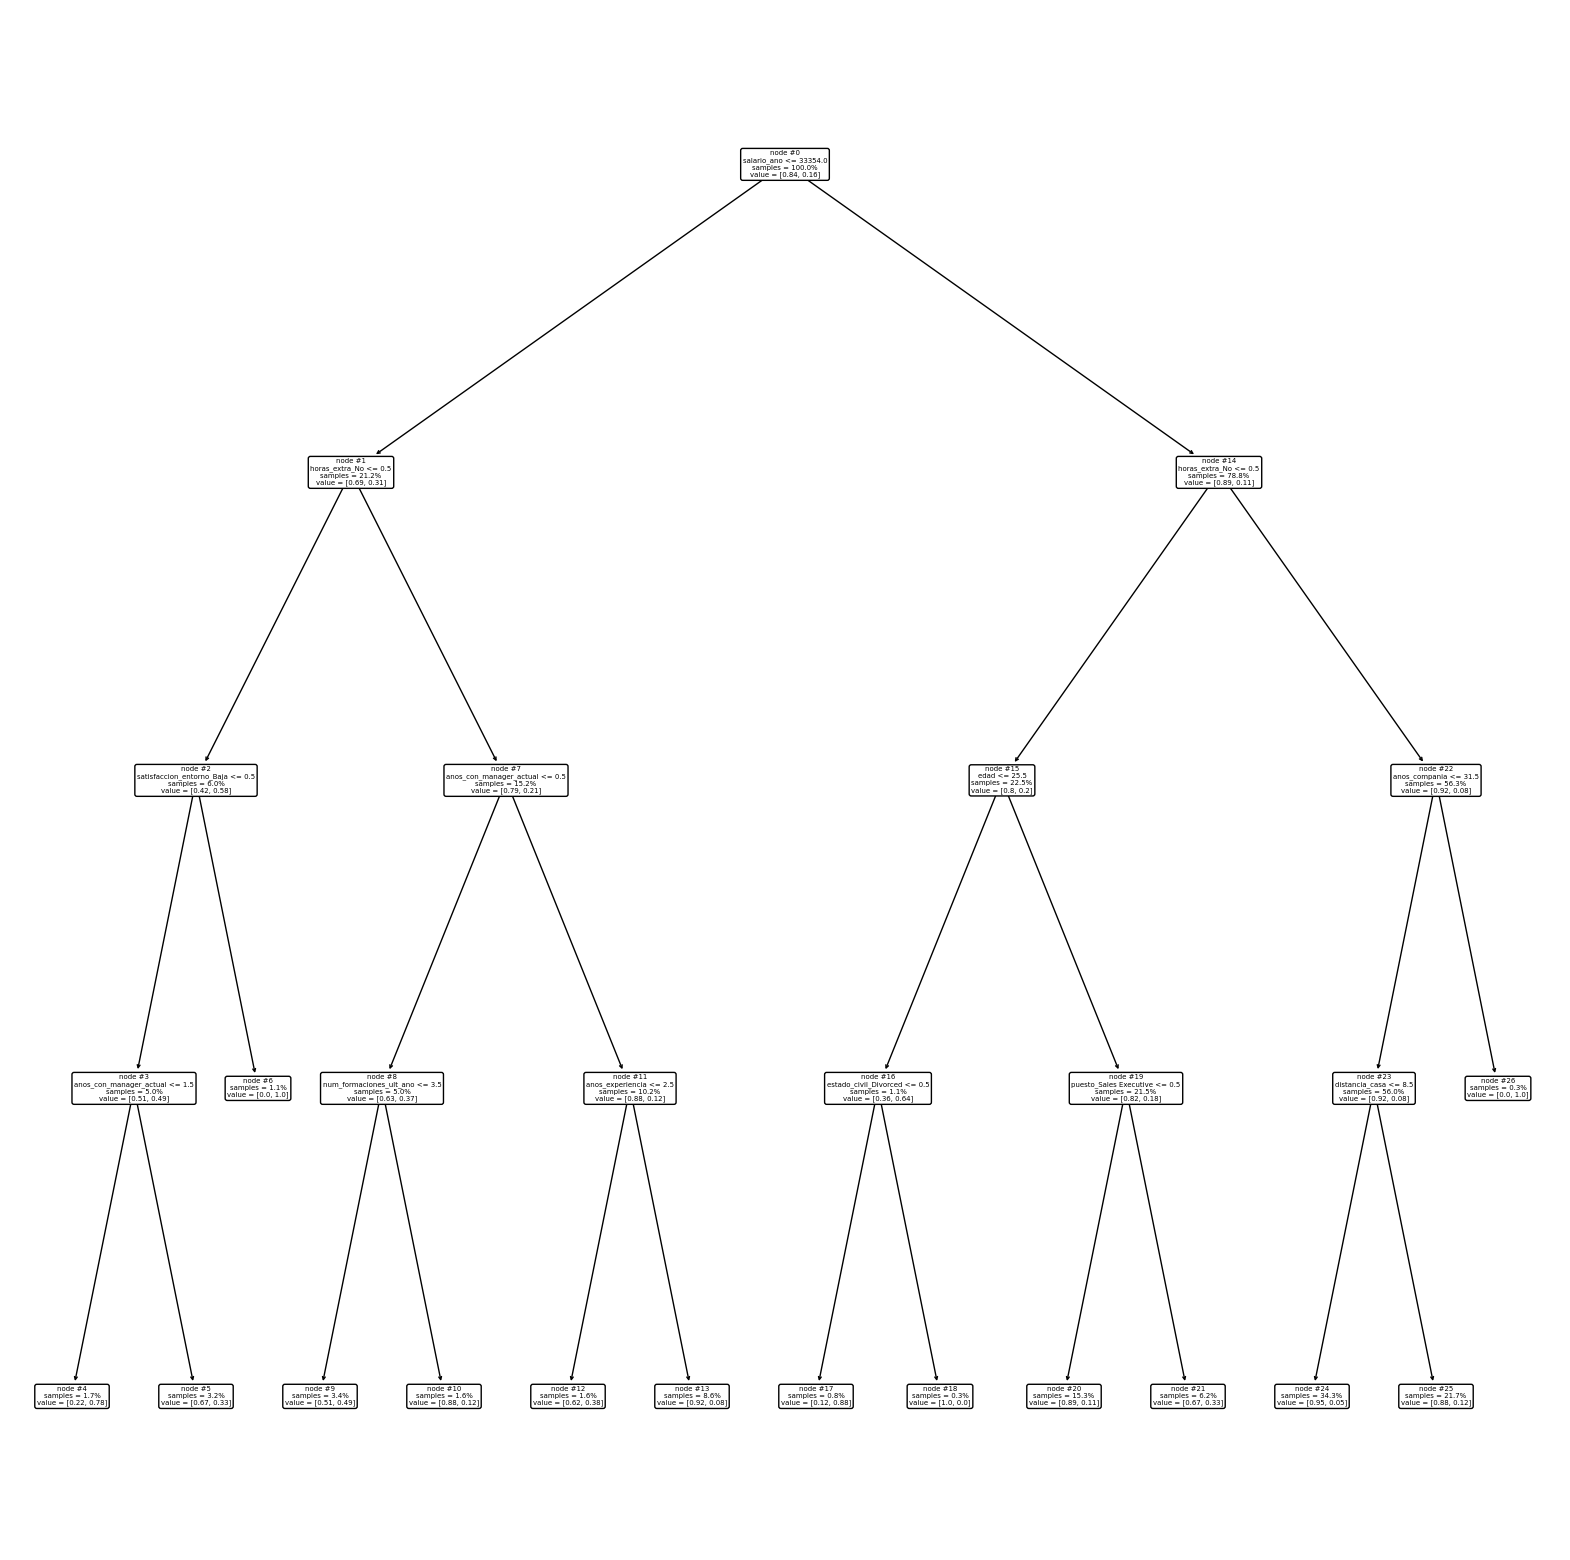

In [156]:
from sklearn.tree import plot_tree

plt.figure(figsize = (20,20))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

### Importancia de las variables

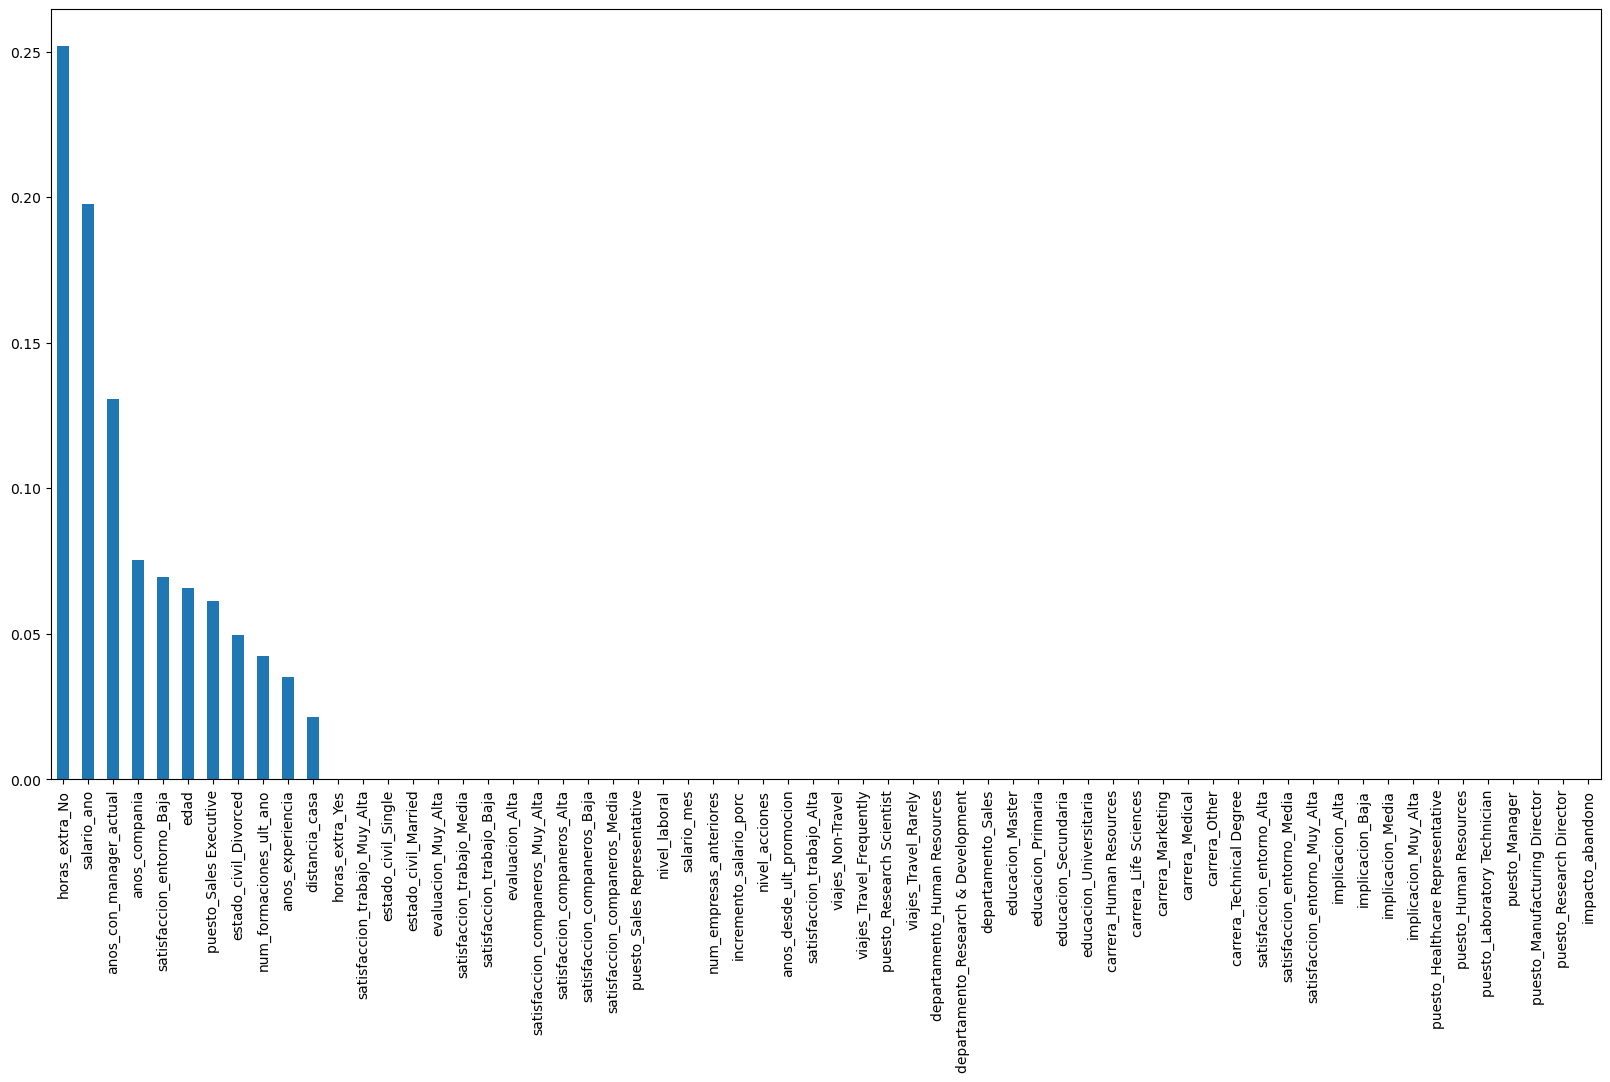

In [158]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (20,10));

### Explotación

- Incorporación del scoring al DataFrame principal

In [160]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]
df['scoring_abandono']

id
1       0.328125
2       0.048159
4       0.777778
5       0.114650
7       0.048159
          ...   
2061    0.078652
2062    0.048159
2064    0.114650
2065    0.048159
2068    0.048159
Name: scoring_abandono, Length: 1470, dtype: float64

- 15 Empleados con mayor probabilidad de dejar la empresa

In [162]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:15]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1248,19,1,Non-Travel,Research & Development,10,Secundaria,Medical,Baja,Media,1,...,Media,0,1,2,1,0,0,22308,3591.588,1.0
776,52,0,Travel_Rarely,Sales,3,Secundaria,Marketing,Alta,Media,4,...,Baja,0,34,3,34,1,16,202272,42477.120,1.0
478,21,1,Travel_Frequently,Sales,1,Secundaria,Technical Degree,Baja,Media,1,...,Alta,0,3,3,3,1,2,26088,4200.168,1.0
1038,52,1,Travel_Rarely,Sales,2,Primaria,Marketing,Baja,Baja,5,...,Muy_Alta,1,33,3,32,6,9,238140,50009.400,1.0
165,58,1,Travel_Rarely,Research & Development,23,Universitaria,Medical,Muy_Alta,Alta,3,...,Muy_Alta,1,40,3,40,15,6,123744,25986.240,1.0
47,50,1,Travel_Rarely,Sales,3,Secundaria,Marketing,Baja,Media,1,...,Alta,0,3,2,3,0,2,32196,6342.612,1.0
1053,26,1,Travel_Frequently,Research & Development,2,Universitaria,Life Sciences,Baja,Alta,1,...,Media,1,6,2,3,1,2,24504,3945.144,1.0
1244,27,0,Travel_Rarely,Research & Development,14,Universitaria,Life Sciences,Baja,Alta,1,...,Muy_Alta,2,9,3,9,6,8,26820,4318.020,1.0
394,26,1,Travel_Rarely,Research & Development,16,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,5,2,3,0,2,28476,4584.636,1.0


- Riesgo de dejar la empresa por puesto de trabajo

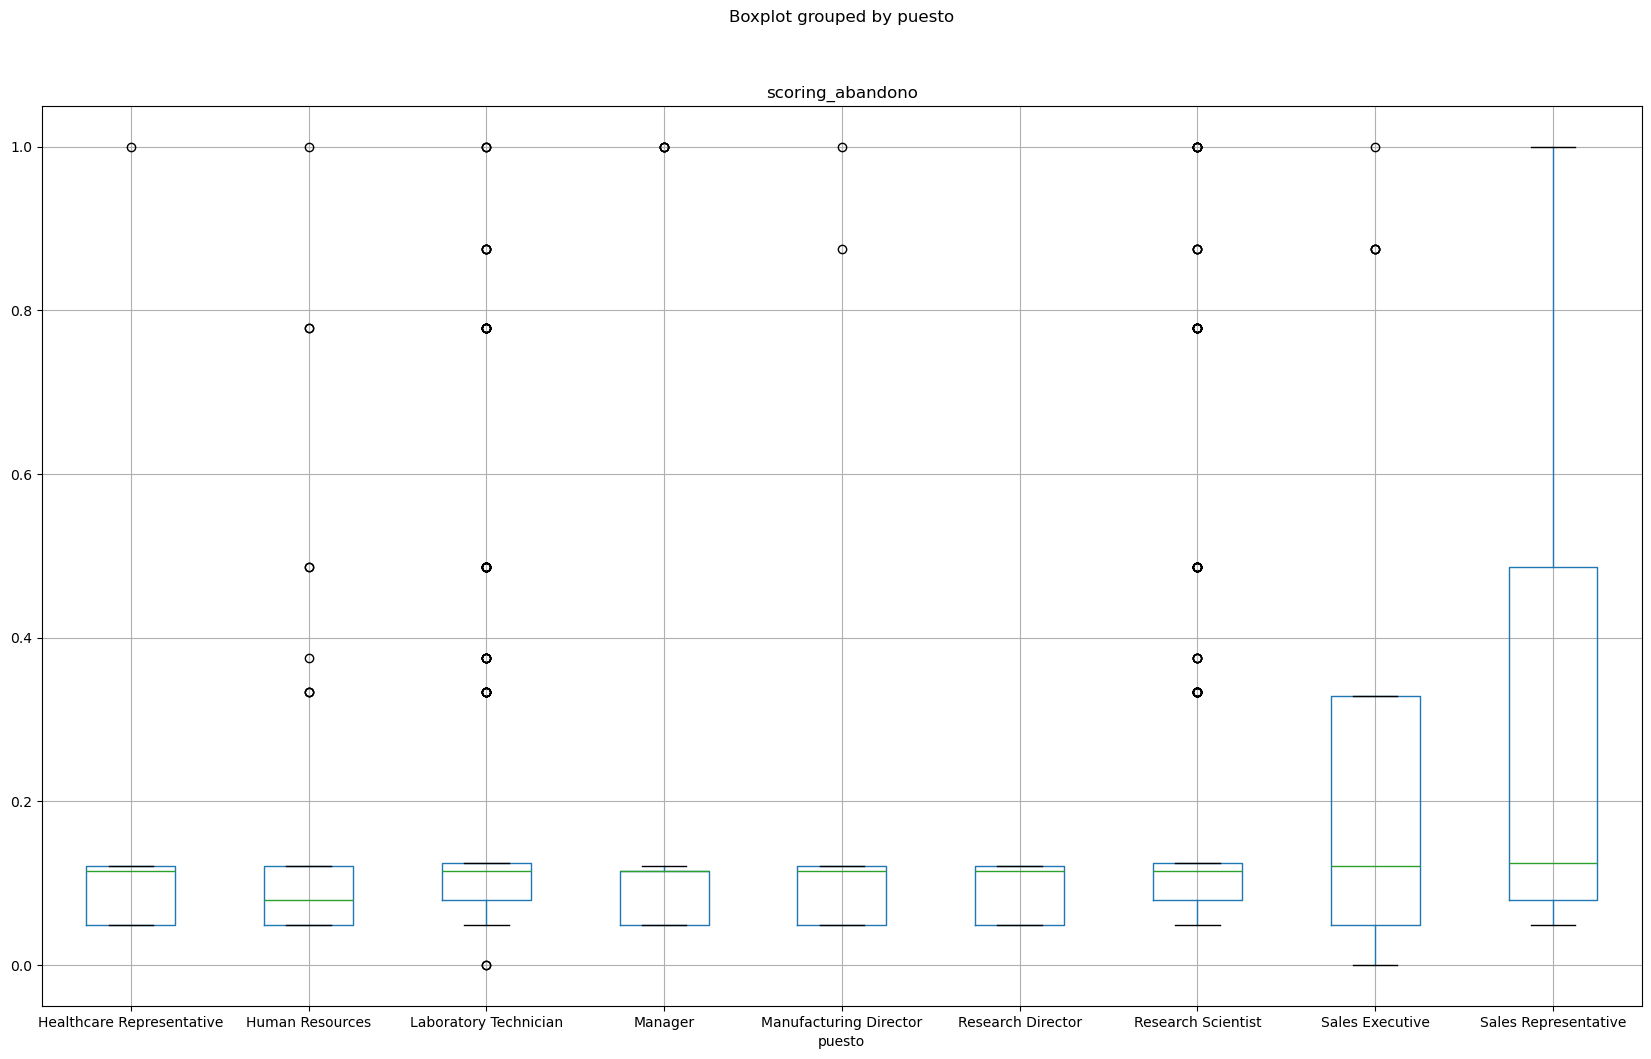

In [164]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

## Guardar el resultado

In [168]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.328125
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.048159
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.777778
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.114650
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.048159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.078652
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.048159
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.114650


### Exportar archivo Excel

In [284]:
from IPython.display import FileLink

file_name = 'abandono_con_scoring.xlsx'
df.to_excel(file_name, index=False)
FileLink(file_name)

C:\Users\ASUS\DS4B\abandono_con_scoring.xlsx